In [1]:
#importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#Dropping Nan Values

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

775265     70000.0
533690     90000.0
548876     77800.0
130666    100000.0
274613     98445.0
217568    116250.0
418582    100000.0
758376    125000.0
624107    115000.0
410974     50388.0
Name: salary_year_avg, dtype: float64

C:\Users\aggar\AppData\Local\Temp\ipykernel_24488\1891545848.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert= False)


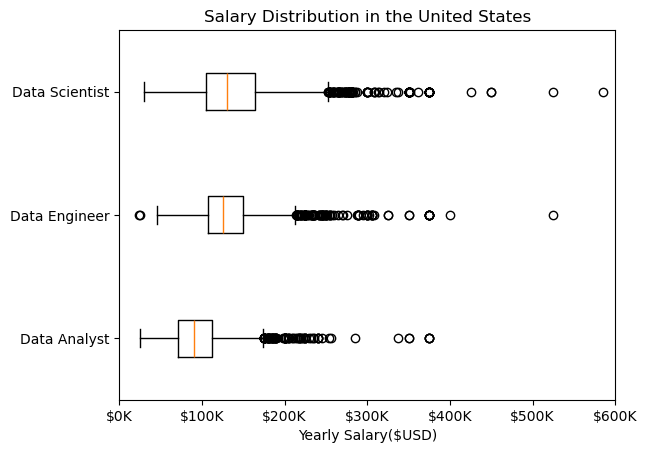

In [23]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels = job_titles, vert= False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()


In [19]:
job_list

[109        89000.0
 180        90250.0
 410       133285.0
 988        62623.0
 1413       71300.0
             ...   
 782637     70000.0
 782798    111175.0
 783588    125000.0
 783866    115000.0
 784882     87500.0
 Name: salary_year_avg, Length: 4350, dtype: float64,
 92        120000.0
 146       129500.0
 307       185000.0
 339       195000.0
 380        97500.0
             ...   
 783111    125000.0
 784102     90000.0
 784191    217500.0
 785624    139216.0
 785641    150000.0
 Name: salary_year_avg, Length: 2915, dtype: float64,
 100       228222.0
 116       114000.0
 257       103128.0
 450       157500.0
 1257       70700.0
             ...   
 785324    234500.0
 785488    115000.0
 785563    136400.0
 785648    221875.0
 785692    157500.0
 Name: salary_year_avg, Length: 4553, dtype: float64]